In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
from anndata import AnnData, read_csv
import seaborn as sns
from matplotlib import pyplot as plt
from glob import glob

In [3]:
adata = sc.read("250303.human.fibroblast.subsampled.fineannot.withTimepoint.h5ad") #60000 cells subset

Only considering the two last: ['.withTimepoint', '.h5ad'].
Only considering the two last: ['.withTimepoint', '.h5ad'].


/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/envs/rpy_base_240331_pertpy/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [4]:
adata.X.toarray().max()

7.9566774

In [5]:
sc.pp.neighbors(adata, use_rep="X_scvi")
sc.tl.umap(adata)

/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/envs/rpy_base_240331_pertpy/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
adata.obs['pcw'] = pd.Categorical(adata.obs['pcw'])

/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/envs/rpy_base_240331_pertpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/envs/rpy_base_240331_pertpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


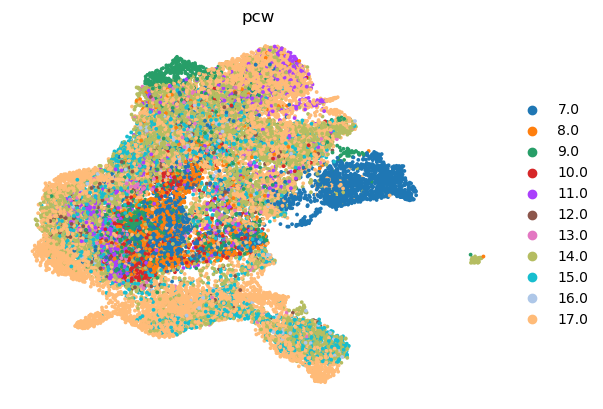

In [7]:
sc.pl.umap(
    adata,
    color=["pcw"],
    frameon=False, size=30
)


In [ ]:
sc.set_figure_params(dpi=300)#, facecolor='white')

/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/envs/rpy_base_240331_pertpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/envs/rpy_base_240331_pertpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(


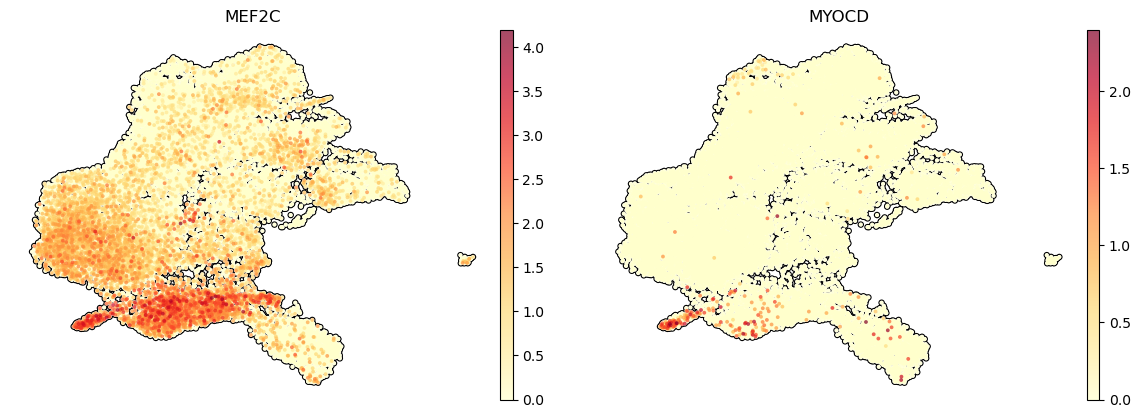

In [8]:
sc.pl.umap(adata, color=['MEF2C', 'MYOCD'], cmap='YlOrRd', size=30, add_outline=True, use_raw=False, wspace=0.1,frameon=False)# save="250217.mef2c.myocd.human.svg")

/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/envs/rpy_base_240331_pertpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/envs/rpy_base_240331_pertpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(


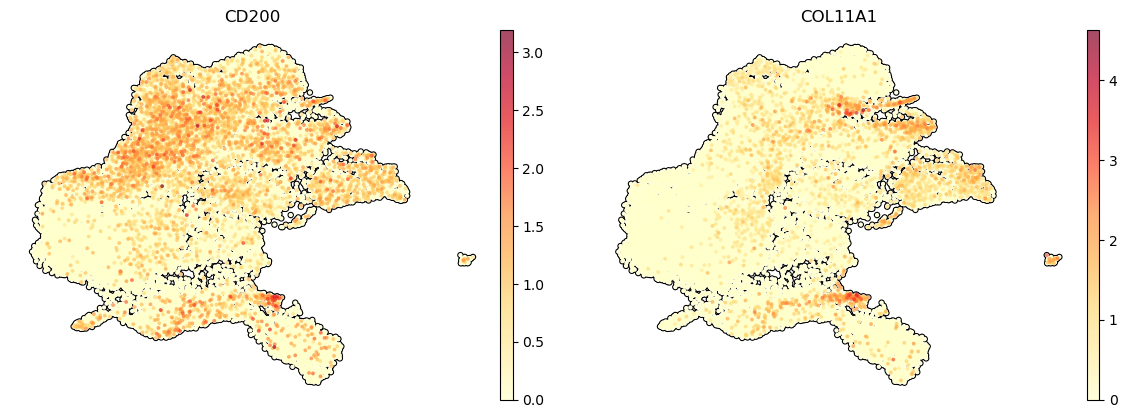

In [9]:
sc.pl.umap(adata, color=['CD200', 'COL11A1'], cmap='YlOrRd', size=30, add_outline=True, use_raw=False, frameon=False, wspace=0.1)# save="250217.cd200.col11a1.human.svg")

/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/envs/rpy_base_240331_pertpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/envs/rpy_base_240331_pertpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(


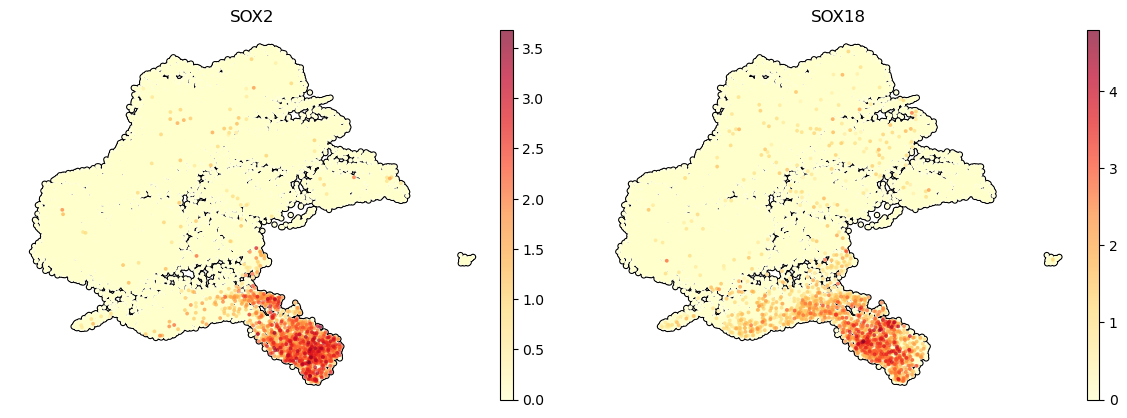

In [11]:
sc.pl.umap(adata, color=['SOX2', 'SOX18'], cmap='YlOrRd', size=30, add_outline=True, use_raw=False, wspace=0.1,frameon=False)# save="250217.sox2.sox18.human.svg")

/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/envs/rpy_base_240331_pertpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/envs/rpy_base_240331_pertpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/envs/rpy_base_240331_pertpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/

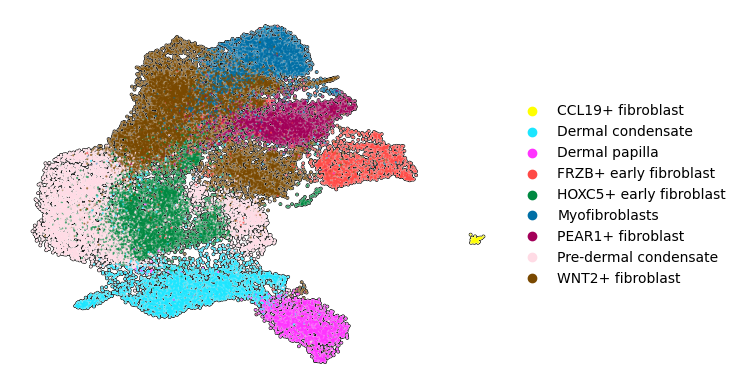

In [12]:
sc.pl.umap(
    adata,
    color=["annotation_fine"], palette=sc.pl.palettes.default_102, size=10, title="", #save="250223.UMAP.original_label.fibroblast.svg",  
    frameon=False, add_outline=True,
)

In [13]:
def cluster_small_multiples(
    adata, clust_key, size=50, frameon=False, legend_loc=None, **kwargs
):
    tmp = adata.copy()
    
    # Ensure the cluster key is categorical
    if not pd.api.types.is_categorical_dtype(adata.obs[clust_key]):
        adata.obs[clust_key] = adata.obs[clust_key].astype("category")

    for i, clust in enumerate(adata.obs[clust_key].cat.categories):
        clust_str = str(clust)  # Convert to string to avoid float-related errors
        tmp.obs[clust_str] = adata.obs[clust_key].isin([clust]).astype("category")

        # Ensure color mapping exists
        if clust_key + "_colors" in adata.uns and len(adata.uns[clust_key + "_colors"]) > i:
            tmp.uns[clust_str + "_colors"] = ["#d3d3d3", adata.uns[clust_key + "_colors"][i]]
        else:
            print(f"Warning: Color mapping for {clust_key} is missing or too short.")

    # Ensure color column names are valid
    color_column_names = adata.obs[clust_key].cat.categories.astype(str).tolist()

    sc.pl.umap(
        tmp,
        groups=tmp.obs[clust_str].cat.categories[1:].values,
        color=color_column_names,  # Use valid categorical labels
        size=size,
        frameon=frameon,
        legend_loc=legend_loc,
        add_outline=True,
        **kwargs,
    )


/tmp/ipykernel_122776/2459803641.py:7: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(adata.obs[clust_key]):
/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/envs/rpy_base_240331_pertpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/envs/rpy_base_240331_pertpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/en

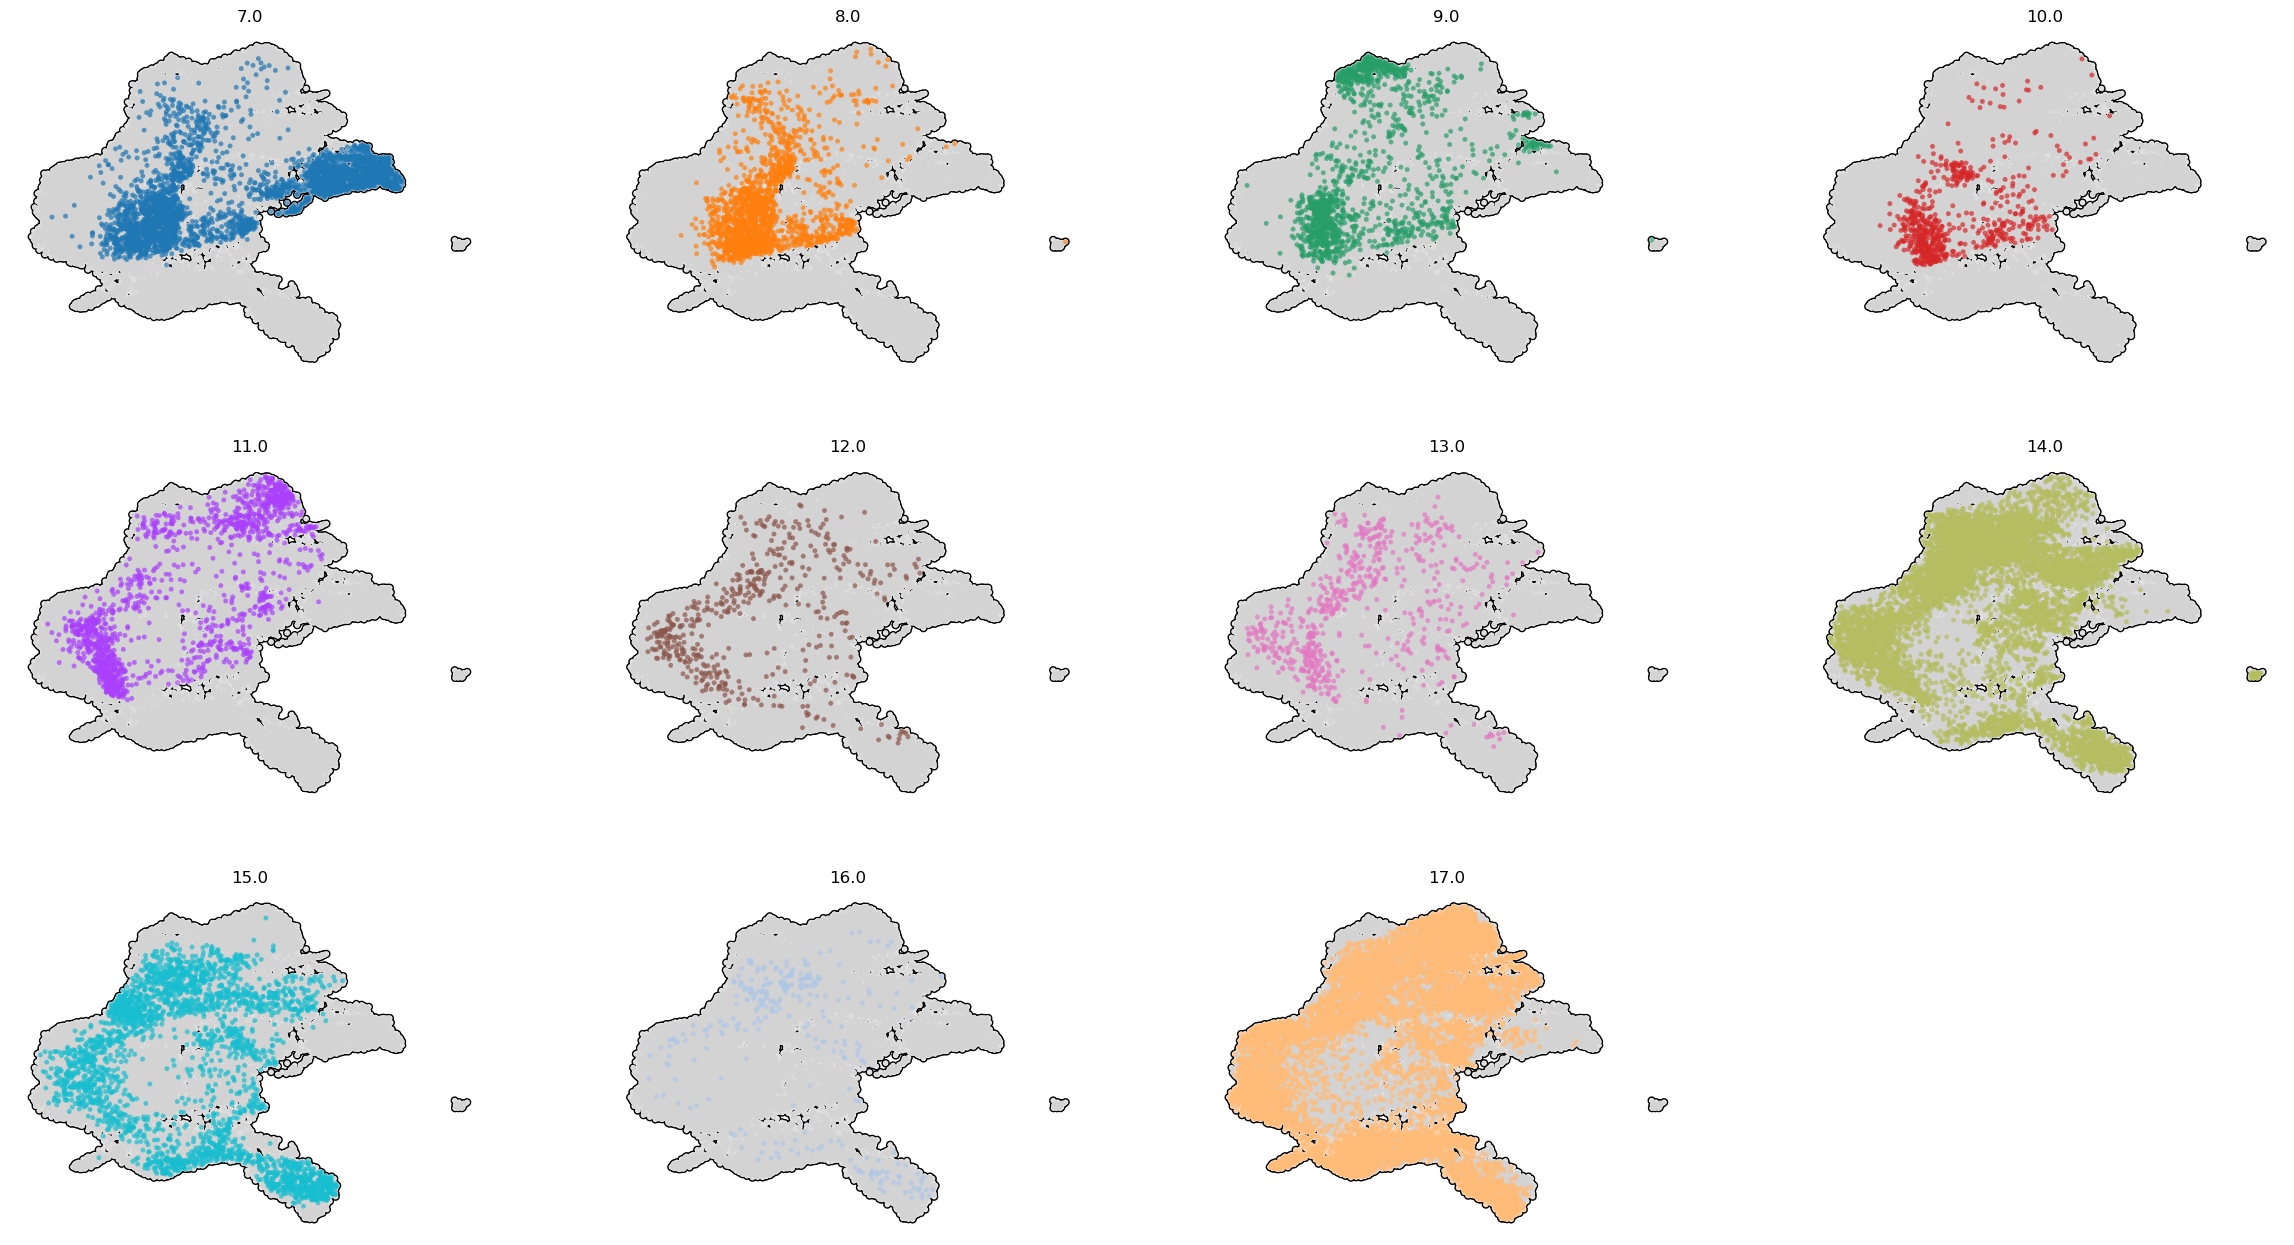

In [14]:
cluster_small_multiples(adata, "pcw")

/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/envs/rpy_base_240331_pertpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/envs/rpy_base_240331_pertpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/envs/rpy_base_240331_pertpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/

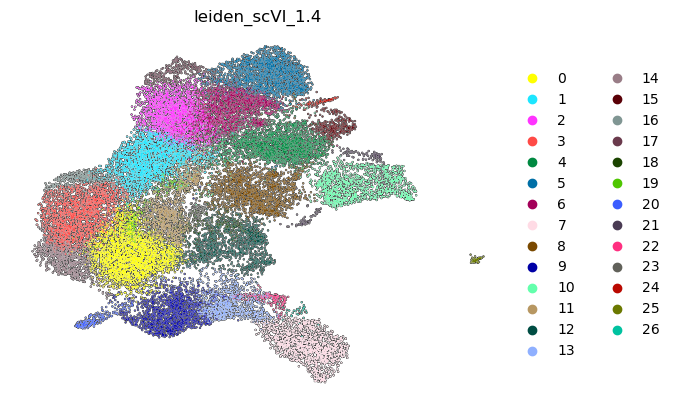

In [15]:
sc.tl.leiden(adata, key_added="leiden_scVI_1.4", resolution=1.4)
sc.pl.umap(
    adata,
    color=["leiden_scVI_1.4"],
    frameon=False, palette=sc.pl.palettes.default_102, add_outline=True, legend_fontoutline=0
)

In [16]:
label_mapping = {
    "0": "Early upper",
    "1": "Reticular/Interstitial",
    "2": "Reticular/Interstitial",
    "3": "Papillary",
    "4": "Reticular/Hypodermal",
    "5": "Reticular/Hypodermal",
    "6": "Reticular/Interstitial",
    "7": "DC/DP",
    "8": "Proliferating lower",
    "9": "MEF2C+ upper",
    "10": "Early mixed(PCW7)",
    "11": "Early upper",
    "12": "Proliferating upper",
    "13": "Dermal condensate",
    "14": "Papillary",
    "15": "Reticular/Hypodermal",
    "16": "Papillary",
    "17": "Reticular/Interstitial",
    "18": "Early upper",
    "19": "Early upper",
    "20": "APM",
    "21": "Early mixed(PCW7)",
    "22": "Dermal sheath",
    "23": "Early upper",
    "24": "Reticular/Hypodermal",
    "25": "UD(CD45+)",
    "26": "DC/DP"
}

adata.obs["new_label2"] = adata.obs["leiden_scVI_1.4"].astype(str).map(label_mapping)

adata.obs[["leiden_scVI_1.4", "new_label2"]].head()

leiden_scVI_1.4              new_label2
index1                                                                      
AGCCTAACAGACACTT-1-FCAImmP7803043                  0             Early upper
ACCCACTGTCTAGAGG-1-FCAImmP7964508                  6  Reticular/Interstitial
CCTACACGTGTTCGAT-1-FCAImmP7964508                 12     Proliferating upper
CGGACGTAGGACAGAA-1-FCAImmP7964509                  2  Reticular/Interstitial
AAGACCTAGCGGATCA-1-HCA_rFSKI14539497               2  Reticular/Interstitial

In [30]:
sc.set_figure_params(dpi=150)#, facecolor='white')

/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/envs/rpy_base_240331_pertpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/envs/rpy_base_240331_pertpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/envs/rpy_base_240331_pertpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/

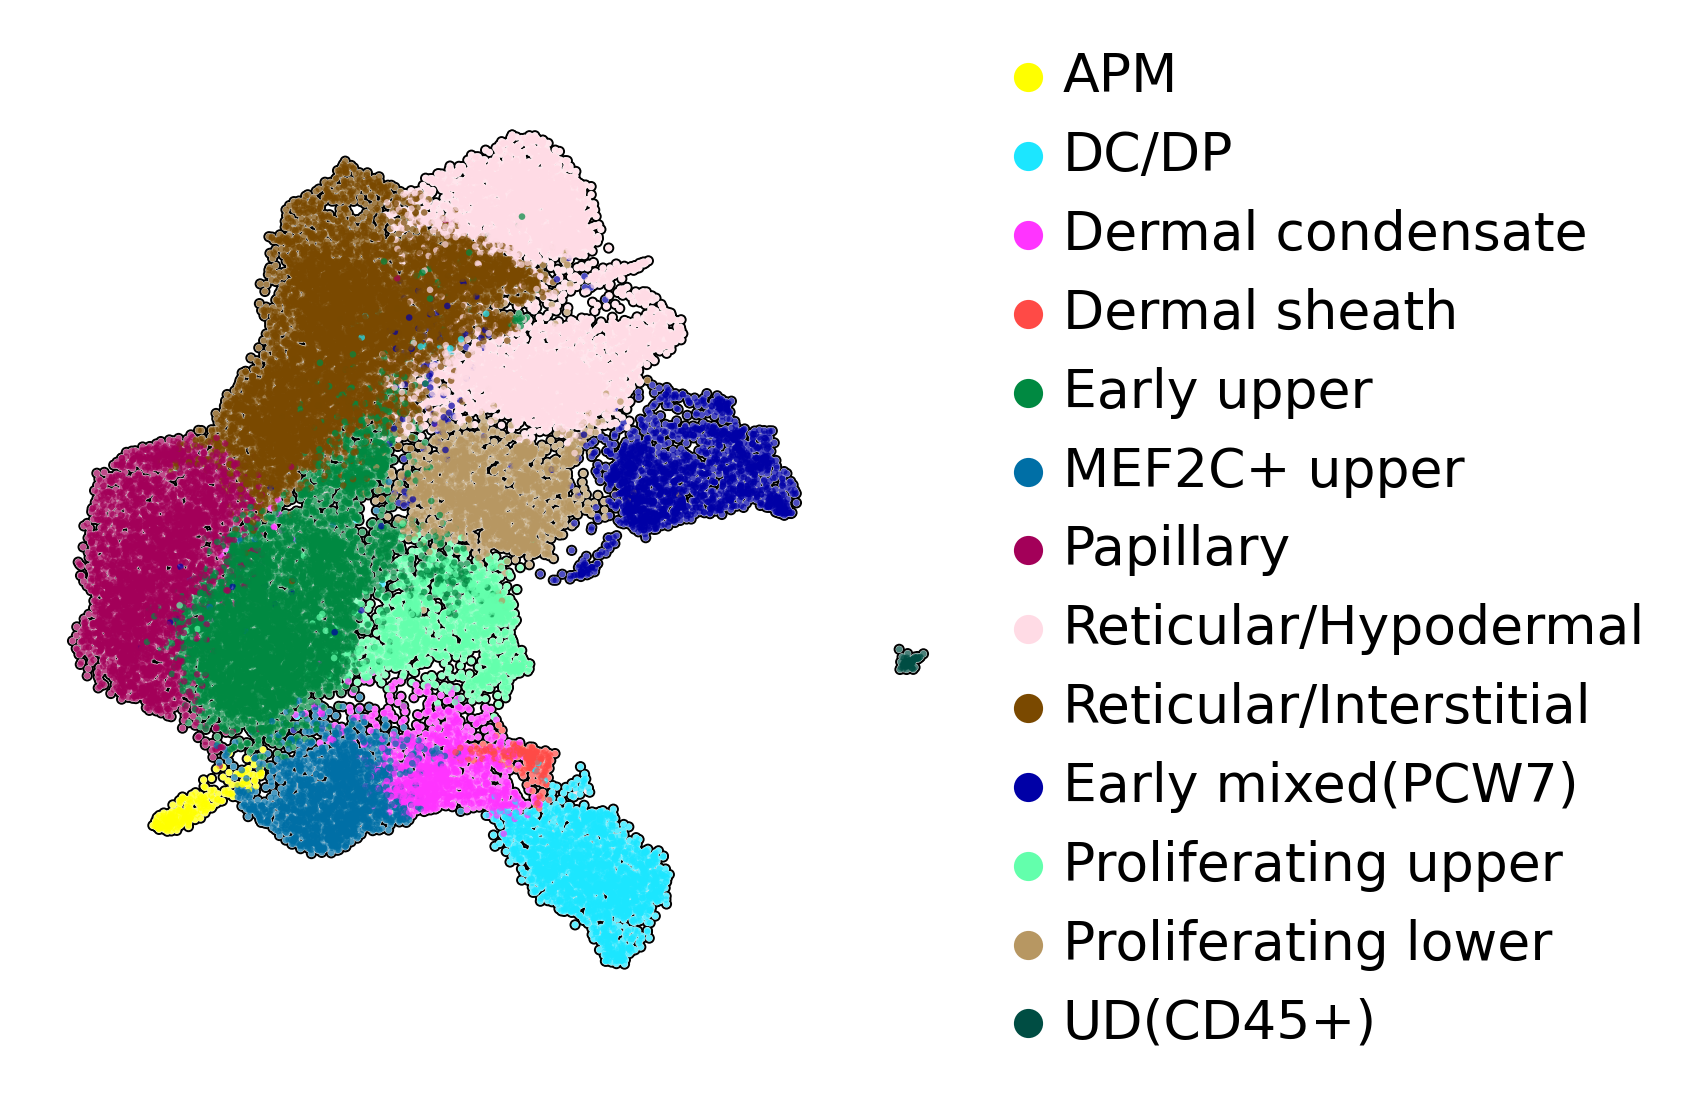

In [31]:
sc.pl.umap(
    adata,
    color=["new_label2"], palette=sc.pl.palettes.default_102, size=10, title="", #save="250222_UMAP.new_label.update2.fibroblast.newlabel2.svg",
    frameon=False, add_outline=True,
)

### Matrix with new label

In [18]:
adata.obs["new_label2"]

index1
AGCCTAACAGACACTT-1-FCAImmP7803043                  Early upper
ACCCACTGTCTAGAGG-1-FCAImmP7964508       Reticular/Interstitial
CCTACACGTGTTCGAT-1-FCAImmP7964508          Proliferating upper
CGGACGTAGGACAGAA-1-FCAImmP7964509       Reticular/Interstitial
AAGACCTAGCGGATCA-1-HCA_rFSKI14539497    Reticular/Interstitial
                                                 ...          
GCGCAGTTCTTAGAGC-1-FCAImmP7579213                    Papillary
CCTTTCTAGCAACGGT-1-FCAImmP7241241                  Early upper
GGCCGATCATCACGTA-1-FCAImmP7803026          Proliferating lower
GTAACGTAGTTACGGG-1-WS_wEMB13942143                   Papillary
GCGCAGTTCAGCGATT-1-FCAImmP7803043            Dermal condensate
Name: new_label2, Length: 30716, dtype: category
Categories (13, object): ['APM', 'DC/DP', 'Dermal condensate', 'Dermal sheath', ..., 'Proliferating upper', 'Reticular/Hypodermal', 'Reticular/Interstitial', 'UD(CD45+)']

In [19]:
adata.obs["new_label2"] = pd.Categorical(adata.obs['new_label2'])

In [20]:
new_order = ['APM', 'DC/DP', 'Dermal condensate', 'Dermal sheath', 'Early upper', 'MEF2C+ upper', 'Papillary', 'Reticular/Hypodermal', 'Reticular/Interstitial', 'Early mixed(PCW7)', 'Proliferating upper', 'Proliferating lower', 'UD(CD45+)'
]

In [21]:
adata.obs["new_label2"] = adata.obs["new_label2"].cat.reorder_categories(new_order, ordered=True)


In [22]:
sc.set_figure_params(scanpy=True, dpi=300, dpi_save=300)

In [23]:
markers=['ACTG2', 'MYOCD', 'MEF2C', 'SOX2', 'CXCR4', 'ALX4', 'COL23A1', 'SOX18', 'COL11A1', 'CD200', 'CRABP1', 'TWIST2', 'PDGFRA', 'COL13A1', 'APCDD1', 'DLK1', 'MEOX2', 'EBF2', 'MFAP5',  'MKI67', 'TOP2A', 'IFITM1', 'PTPRC' ]

/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/envs/rpy_base_240331_pertpy/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/envs/rpy_base_240331_pertpy/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/mnt/gmi-l1/_90.User_Data/revolvefire/miniforge3/envs/rpy_base_240331_pertpy/lib/python3.11/site-packages/scanpy/plotting/_do

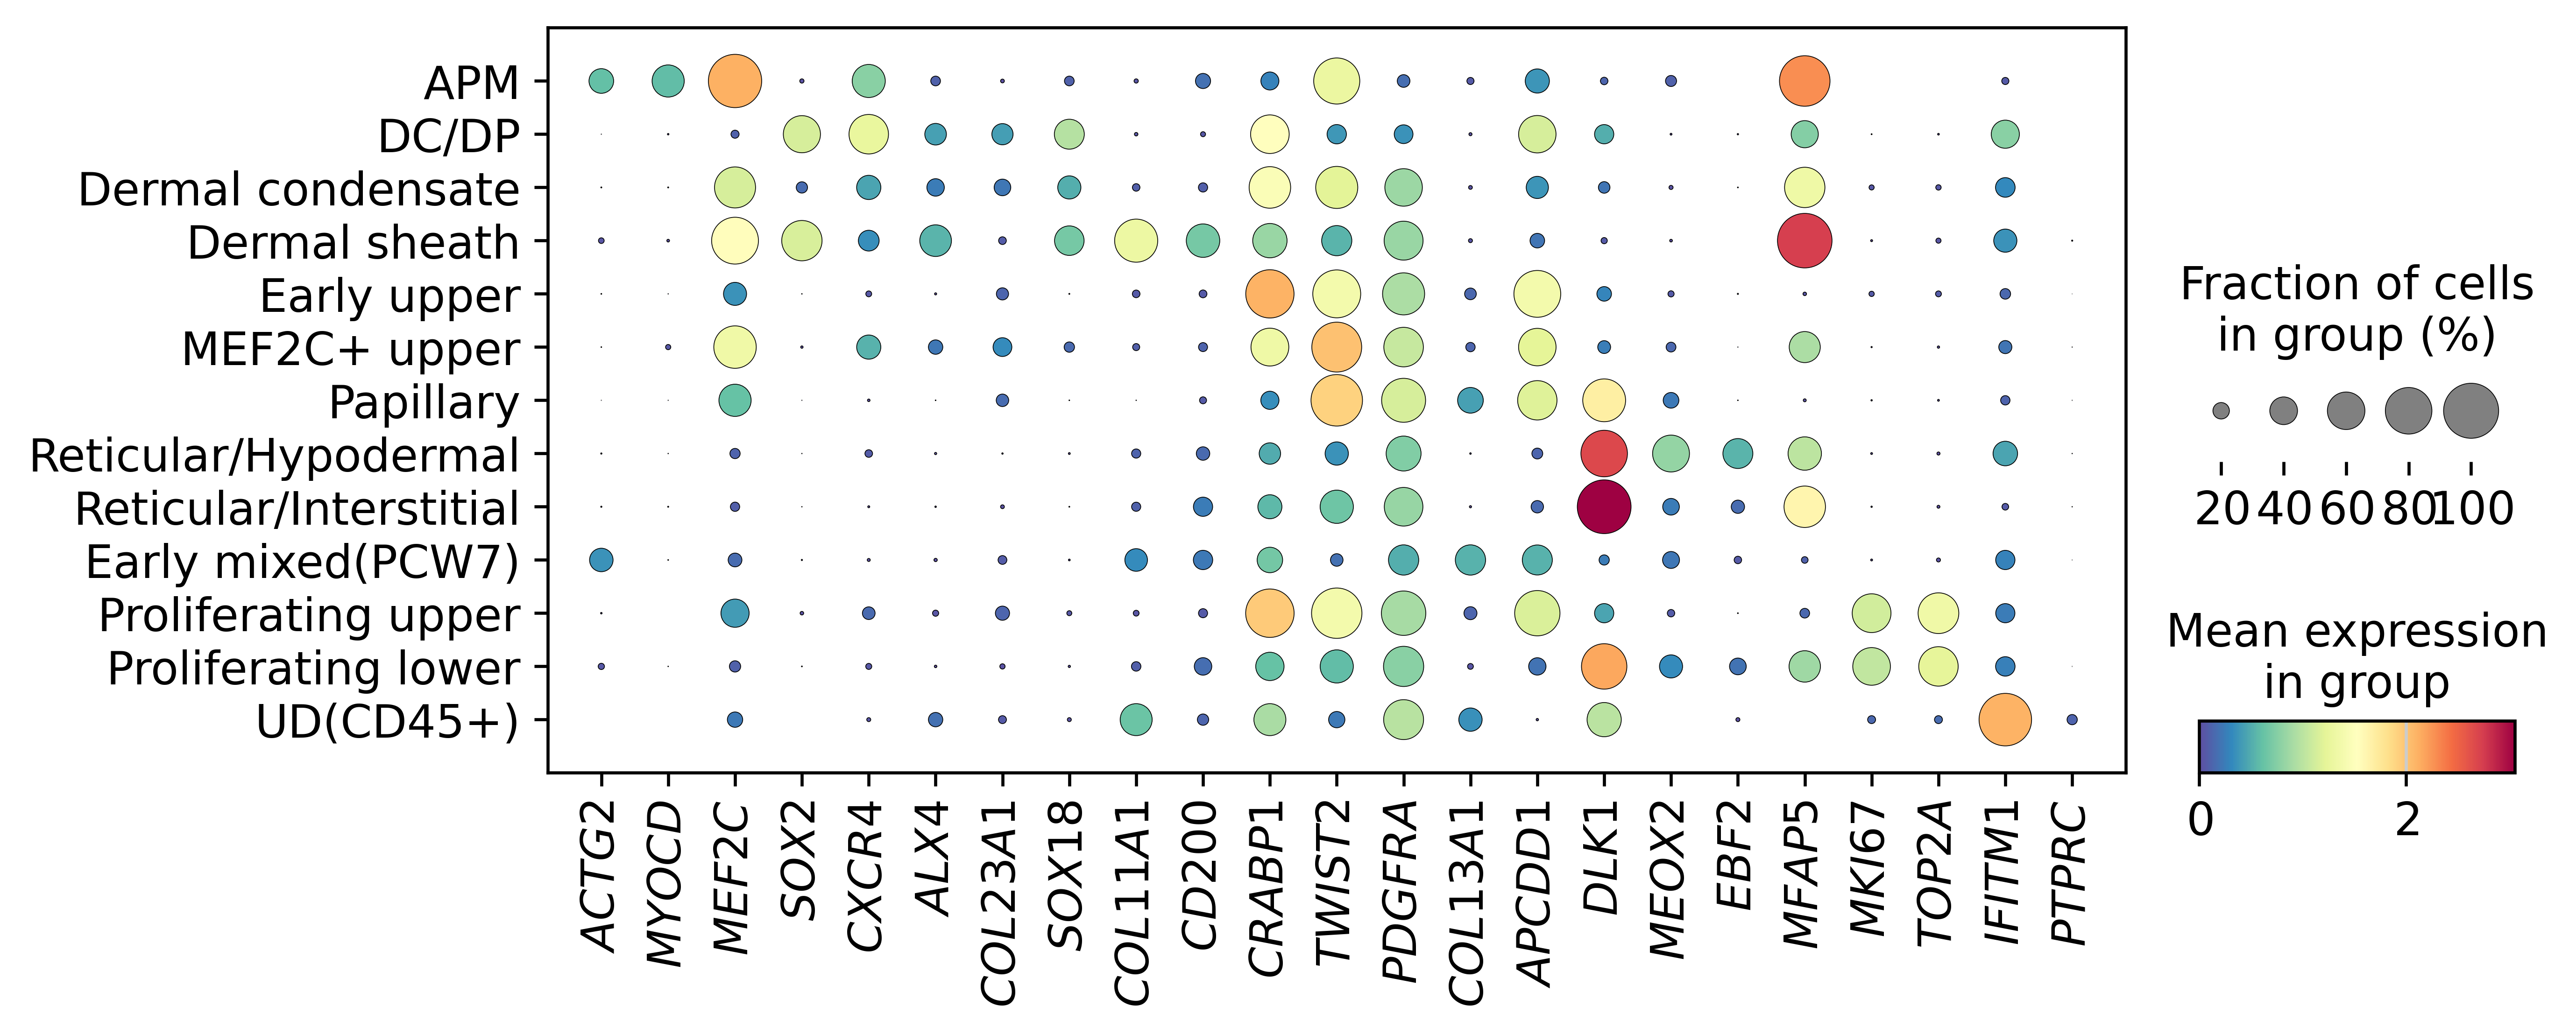

In [24]:
sc.pl.dotplot(
    adata,
    markers,
    groupby='new_label2',
    use_raw=False,
    cmap='Spectral_r',
    figsize=(9,3.5),
    #layer='scaled',
    show=False  
)

fig = plt.gcf()

for ax in fig.axes:
    tick_labels = [tick.get_text() for tick in ax.get_xticklabels()]
    italic_labels = [f"$\\mathit{{{label}}}$" for label in tick_labels]
    ax.set_xticklabels(italic_labels, )

#fig.savefig("250223.fetus_relabel_dotplot.non_scaled.svg", dpi=300, format="svg", bbox_inches="tight")
plt.show()

In [25]:
categories = adata.obs['new_label2'].cat.categories
print("Categories:", categories)
if 'new_label_colors' in adata.uns:
    colors = adata.uns['new_label2_colors']
    print("Assigned colors:", colors)
else:
    print("No color mapping found in adata.uns for 'new_label2'.")

Categories: Index(['APM', 'DC/DP', 'Dermal condensate', 'Dermal sheath', 'Early upper',
       'MEF2C+ upper', 'Papillary', 'Reticular/Hypodermal',
       'Reticular/Interstitial', 'Early mixed(PCW7)', 'Proliferating upper',
       'Proliferating lower', 'UD(CD45+)'],
      dtype='object')
No color mapping found in adata.uns for 'new_label2'.


In [26]:
plt.rcParams["figure.figsize"] = [3, 5]

In [27]:
plt.rcParams["figure.dpi"] = 300

<Figure size 900x1500 with 0 Axes>

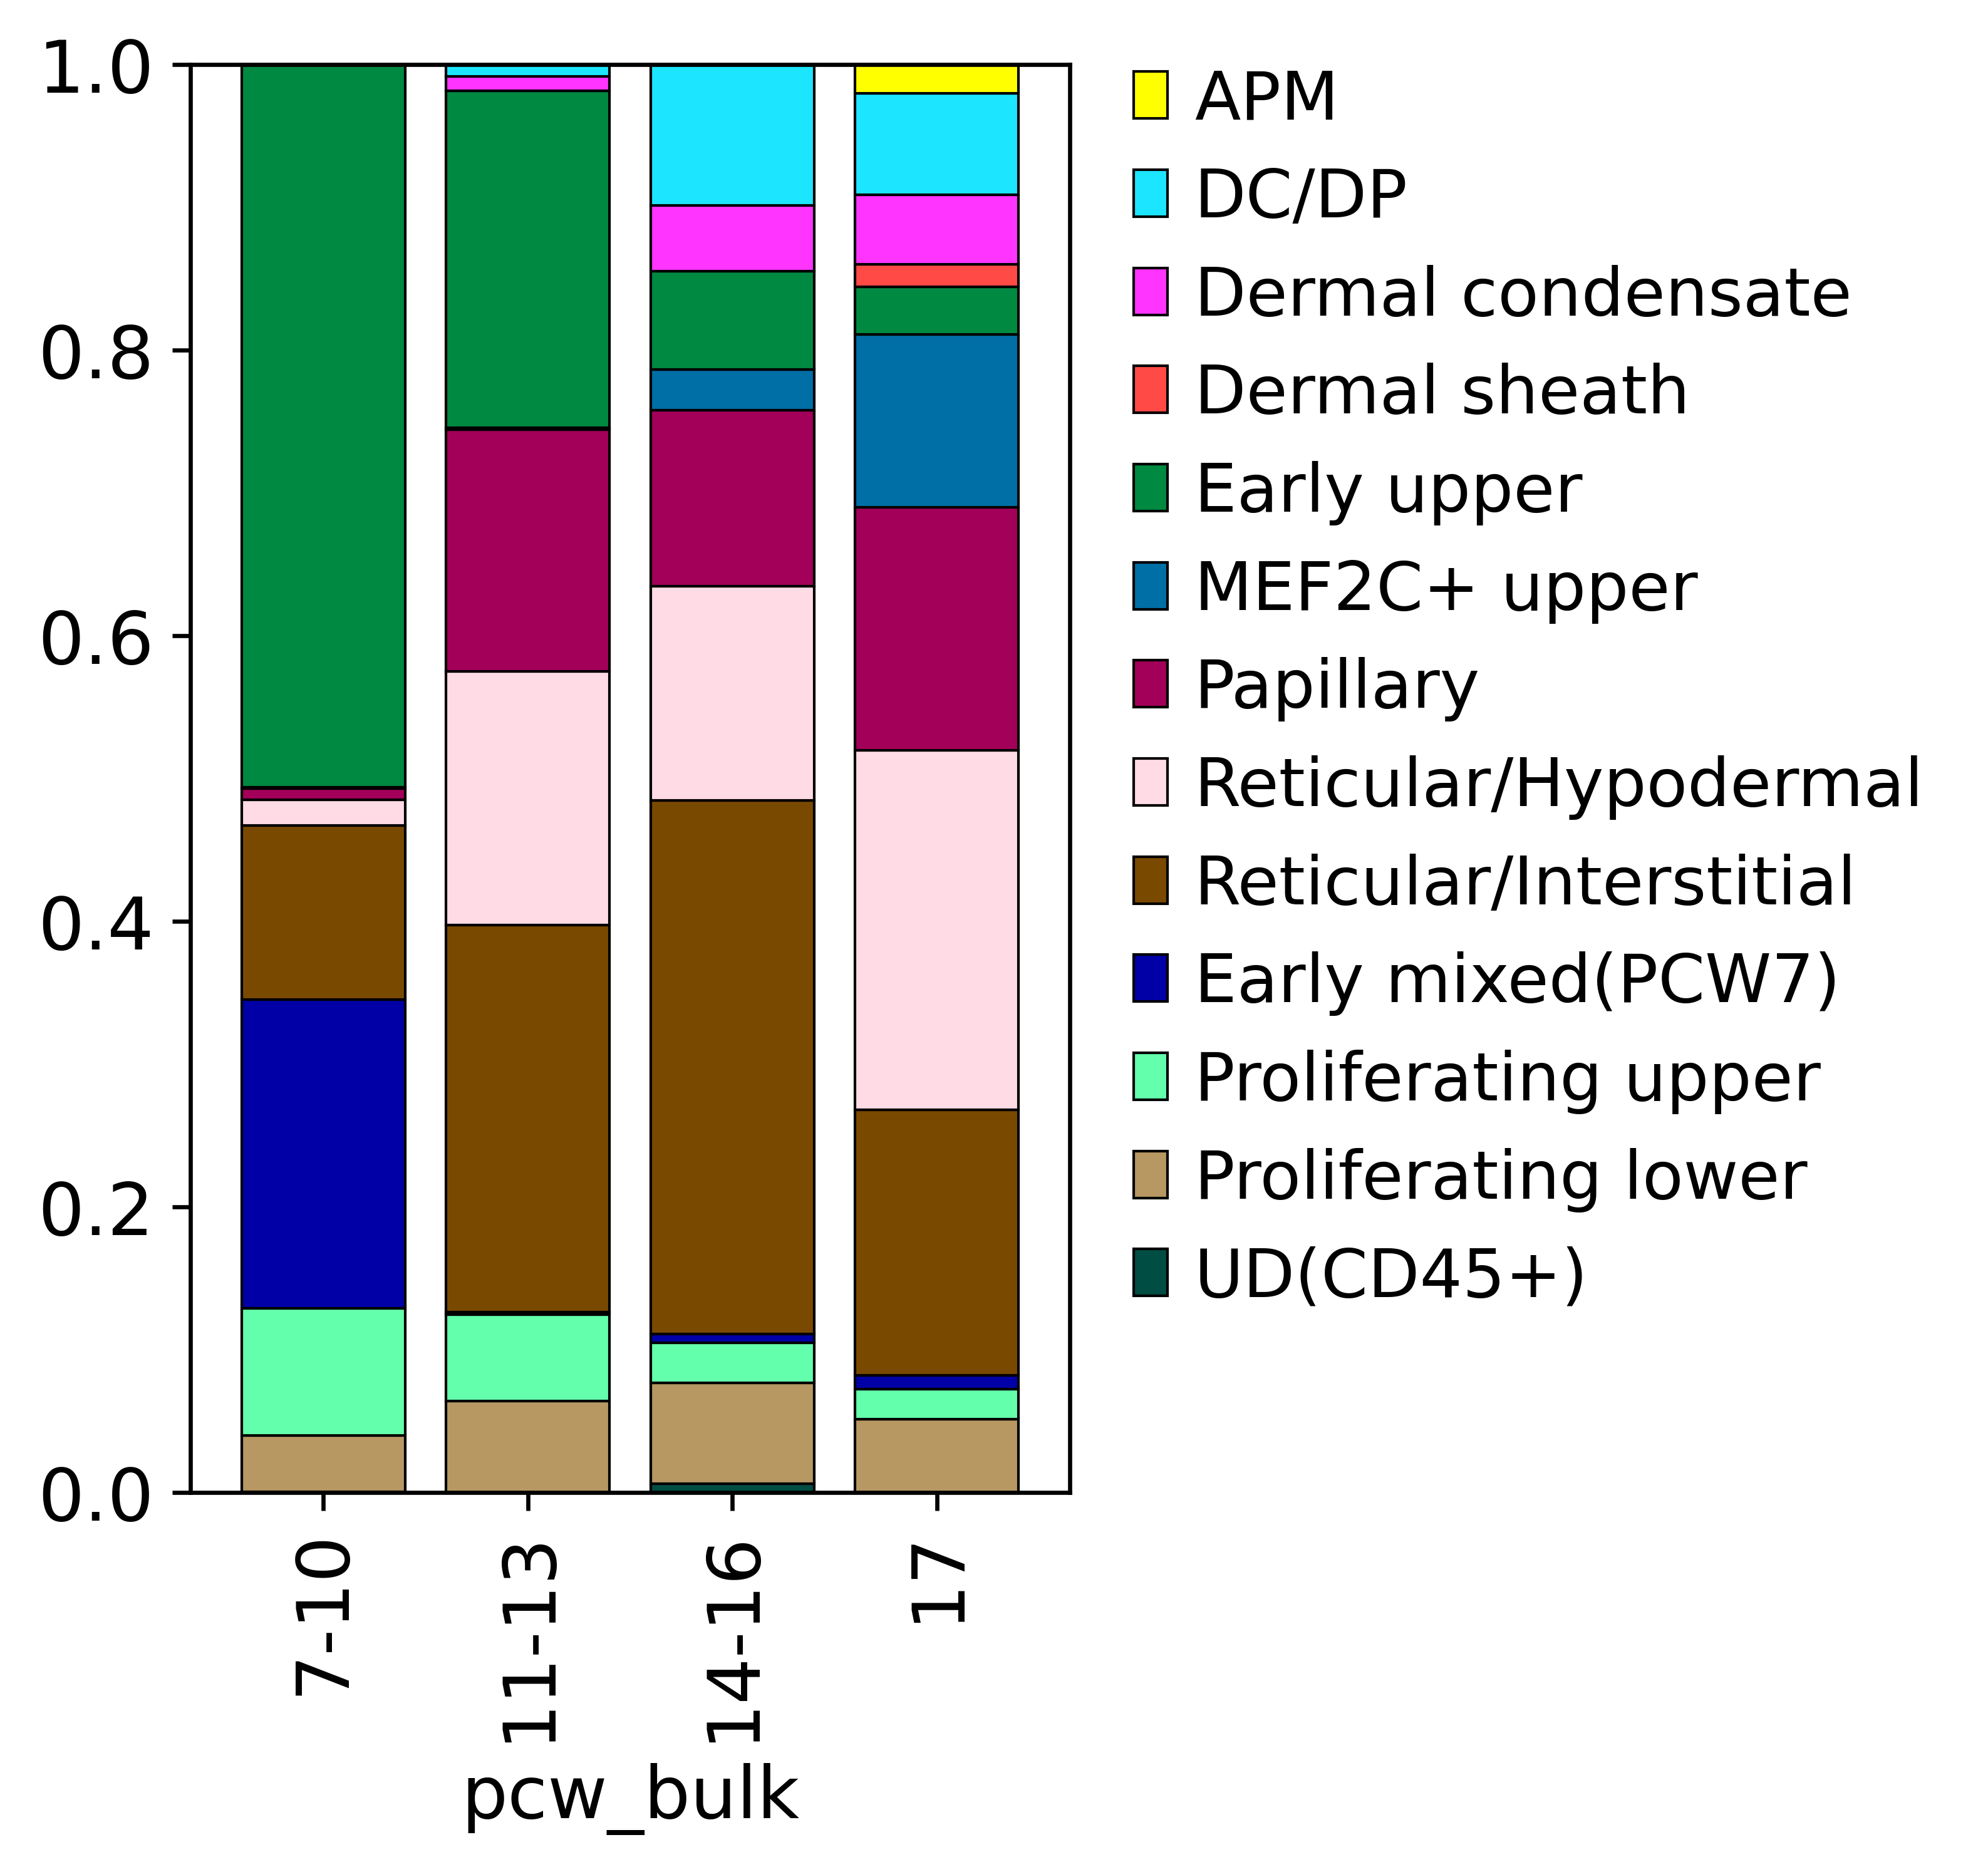

In [28]:
from matplotlib.pyplot import rc_context
from matplotlib import pyplot as plt

# Assuming your 'tmp' DataFrame is correctly set up as before
with rc_context():
    plt.figure()
    tmp = pd.crosstab(adata.obs['pcw_bulk'], adata.obs['new_label2'], normalize='index')
    tmp = tmp[tmp.columns[::-1]]
    
    tmp.plot.bar(stacked=True, width=0.80, color={
    "APM": "#FFFF00",
    "DC/DP": "#1CE6FF",
    "Dermal condensate": "#FF34FF",
    "Dermal sheath": "#FF4A46",
    "Early upper": "#008941",
    "MEF2C+ upper": "#006FA6",
    "Papillary": "#A30059",
    "Reticular/Hypodermal": "#ffdbe5",
    "Reticular/Interstitial": "#7a4900",
    "Early mixed(PCW7)": "#0000a6",
    "Proliferating upper": "#63ffac",
    "Proliferating lower": "#b79762",
    "UD(CD45+)": "#004d43"
    }, edgecolor='black', linewidth=0.5 )
    plt.grid(False)
    plt.legend(loc='upper right', bbox_to_anchor=(2.04, 1.04), reverse=True, frameon=False)
    plt.ylim(0,1)
    #plt.savefig('250223.human.fibroblast.newlabel2.svg', dpi=300, bbox_inches='tight')
    plt.show()
